Riya & Austin<br/>Section 3

# Question

### What would happen if Olin students kept coming to class during an meningococcal meningitis outbreak?

# Model

### Setting up the environment

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import matplotlib.pyplot as plt


# import functions from the modsim.py module
from modsim import *

In [3]:
'''
S: Susceptible
Q: Quarantine
C: Coming to class
R: Recovered
D: Dead XP
'''

init = State(S=360, Q=0, C=2, R=0, D=0)

,values
S,360
Q,0
C,2
R,0
D,0


In [4]:
'''
i: contagion rate
p: proportion quarantined
g: "go home" rate (a.k.a. C->Q rate)
alpha: quarantined recovery rate
beta: quarantined death rate
gamma: coming to class recovery rate
sigma: coming to class death rate
'''

system = System(
    i=2,
    p=0.4,
    g=0.3,
    alpha=0.4,
    beta=0.1,
    gamma=0.001,
    sigma=0.5
)

,values
i,2.000
p,0.400
g,0.300
alpha,0.400
beta,0.100
gamma,0.001
sigma,0.500


In [5]:
def update_func(state, system, dt=1):
    unpack(state)
    unpack(system)
    
    if S <= 0:
        delta = 0
    else:
        delta = i/S

    infections = min([S * C * delta, S])
    recoveries = min([Q*alpha + C*gamma, 80])
    deaths     = min([Q*beta + C*sigma, 80])
    
    
    dSdt = -infections * dt
    dQdt = (infections * p + C*g - Q*alpha - Q*beta) * dt
    dCdt = (infections * (1-p) - C*gamma - C*sigma - C*g) * dt
    dRdt = (recoveries) * dt
    dDdt = (deaths) * dt
    
    s,q,c,r,d = S,Q,C,R,D
    
    return State(
        S = s + dSdt,
        Q = q + dQdt,
        C = c + dCdt,
        R = r + dRdt,
        D = d + dDdt
    )

In [6]:
def run_simulation(system, init, t_end, dt):
    unpack(system)
    
    results = TimeFrame(columns=init.index)
    results.row[0] = init
    
    for t in linrange(0, t_end, dt):
        results.row[t+dt] = update_func(results.row[t], system, dt)
    
    return results

In [7]:
def plot_results(results):
    plot(results['S'], '-', label='Susceptible')
    plot(results['C'], '--', label='Coming to class')
    plot(results['Q'], ':', label='Quarantined')
    plot(results['R'], '.-', label='Recovered')
    plot(results['D'], '.', label='Dead')
    decorate(xlabel='Time (days)', ylabel='Population')

          S           Q            C         R        D
0       360           0            2         0        0
1       356         2.2        2.798     0.002        1
2   350.404      4.1778       3.9144  0.884798    2.619
3   342.575     6.39474      5.47625   2.55983  4.99398
4   331.623     9.22124      7.66127   5.12321  8.37158
5     316.3      13.038      10.7181   8.81936  13.1243
6   294.864     18.3089      14.9946   14.0453  19.7872
7   264.875     25.6486      20.9775   21.3839  29.1154
8    222.92     35.8996      29.3475   31.6643   42.169
9   164.225     50.2321      41.0572   46.0534  60.4328
10  82.1101      70.279       57.439   66.1873  85.9846
11        0     85.2152      60.6964   94.3564  121.732
12        0     60.8165      12.0786   128.503  160.602
13        0     34.0318      2.40364   152.842  172.723
14        0      17.737     0.478324   166.457  177.328
15        0     9.01201    0.0951865   173.552  179.341
16        0     4.53456    0.0189421   177.157  

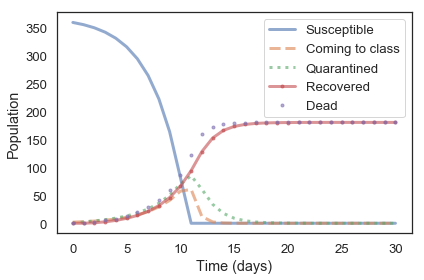

In [8]:
results = run_simulation(system, init, 30, 1)
plot_results(results)
print(results)

# Results

In [ ]:
"""
peeps amount don't matter
"""

# Interpretation